In [1]:
#Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import the csv data as panda dataframes
StudentPerformance = pd.read_csv('data/StudentsPerformance.csv')

In [3]:
#Show first 5 records
StudentPerformance.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
#Shape of dataset
StudentPerformance.shape

(1000, 8)

In [5]:
StudentPerformance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
#Check missing values
StudentPerformance.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [7]:
#Check duplicate values
StudentPerformance.duplicated().sum()

0

In [8]:
StudentPerformance.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [9]:
#Check the statistics of the data
StudentPerformance.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


OBSERVATIONS
1) The mean for all the three scores is pretty close mostly between 66 and 69
2) Like mean, even the standard deviation are close, ranging between 14.6 and 15.19
3) Although the minimum scores are variant, but the 25%, 50% and 75% values for all the three scores are close enough.

In [10]:
#Exploring the dataset
print("Different values for gender attribute: ",end=" ")
print(StudentPerformance['gender'].unique())

print("Different values for race/ethnicity attribute: ",end=" ")
print(StudentPerformance['race_ethnicity'].unique())

print("Different values for parental level of education attribute: ",end=" ")
print(StudentPerformance['parental_level_of_education'].unique())

print("Different values for lunch attribute: ",end=" ")
print(StudentPerformance['lunch'].unique())

print("Different values for test preparation course attribute: ",end=" ")
print(StudentPerformance['test_preparation_course'].unique())

Different values for gender attribute:  ['female' 'male']
Different values for race/ethnicity attribute:  ['group B' 'group C' 'group A' 'group D' 'group E']
Different values for parental level of education attribute:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Different values for lunch attribute:  ['standard' 'free/reduced']
Different values for test preparation course attribute:  ['none' 'completed']


In [11]:
#Define numerical & categorical columns
numerical_features = [feature for feature in StudentPerformance.columns if StudentPerformance[feature].dtype != 'O']
categorical_features = [feature for feature in StudentPerformance.columns if StudentPerformance[feature].dtype == 'O']

#Print columns
print('Total number of numerical feature: {}'.format(len(numerical_features)))
print('Numerical features are: {}'.format((numerical_features)))
print('Total number of categorical feature: {}'.format(len(categorical_features)))
print('Categorical features are: {}'.format((categorical_features)))

Total number of numerical feature: 3
Numerical features are: ['math_score', 'reading_score', 'writing_score']
Total number of categorical feature: 5
Categorical features are: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [12]:
#Feature Engineering
#Adding columns for total score and average
StudentPerformance['total_score'] = StudentPerformance['math_score']+StudentPerformance['reading_score']+StudentPerformance['writing_score']
StudentPerformance['average'] = StudentPerformance['total_score']/3
StudentPerformance.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [13]:
reading_full = StudentPerformance[StudentPerformance['reading_score']==100]['average'].count()
writing_full = StudentPerformance[StudentPerformance['writing_score']==100]['average'].count()
math_full = StudentPerformance[StudentPerformance['math_score']==100]['average'].count()

print(f"Total number of students that scored full in maths: {math_full}")
print(f"Total number of students that scored full in reading: {reading_full}")
print(f"Total number of students that scored full in writing: {writing_full}")

Total number of students that scored full in maths: 7
Total number of students that scored full in reading: 17
Total number of students that scored full in writing: 14


In [14]:
reading_fail = StudentPerformance[StudentPerformance['reading_score']<=35]['average'].count()
writing_fail = StudentPerformance[StudentPerformance['writing_score']<=35]['average'].count()
math_fail = StudentPerformance[StudentPerformance['math_score']<=35]['average'].count()

print(f"Total number of students that failed in maths: {math_fail}")
print(f"Total number of students that failed in reading: {reading_fail}")
print(f"Total number of students that failed in writing: {writing_fail}")

Total number of students that failed in maths: 27
Total number of students that failed in reading: 15
Total number of students that failed in writing: 18


DATA VISUALISATION

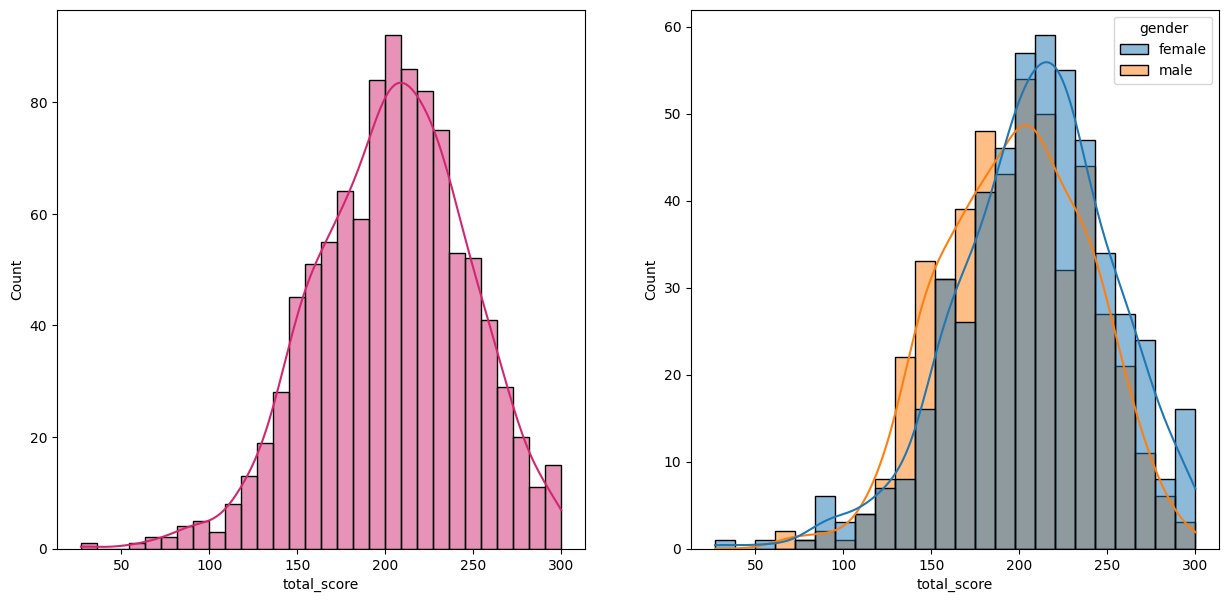

In [15]:
#Histogram & KDE
fig, axs = plt.subplots(1, 2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=StudentPerformance, x='total_score', bins = 30, kde=True, color='#d12771')
plt.subplot(122)
sns.histplot(data=StudentPerformance, x='total_score', kde=True, hue='gender')
plt.show()

Observation:
Females perform better than the males

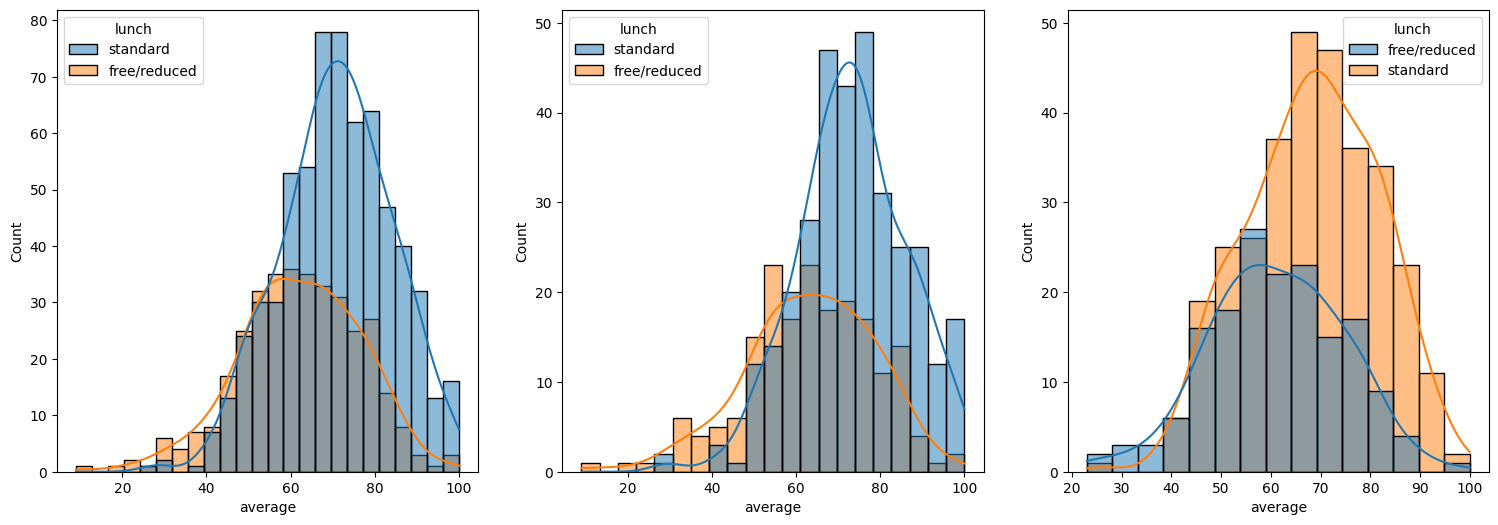

In [16]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=StudentPerformance, x='average', kde=True, hue='lunch')
plt.subplot(142)
sns.histplot(data=StudentPerformance[StudentPerformance.gender=='female'], x='average', kde=True, hue='lunch')
plt.subplot(143)
sns.histplot(data=StudentPerformance[StudentPerformance.gender=='male'], x='average', kde=True, hue='lunch')
plt.show()

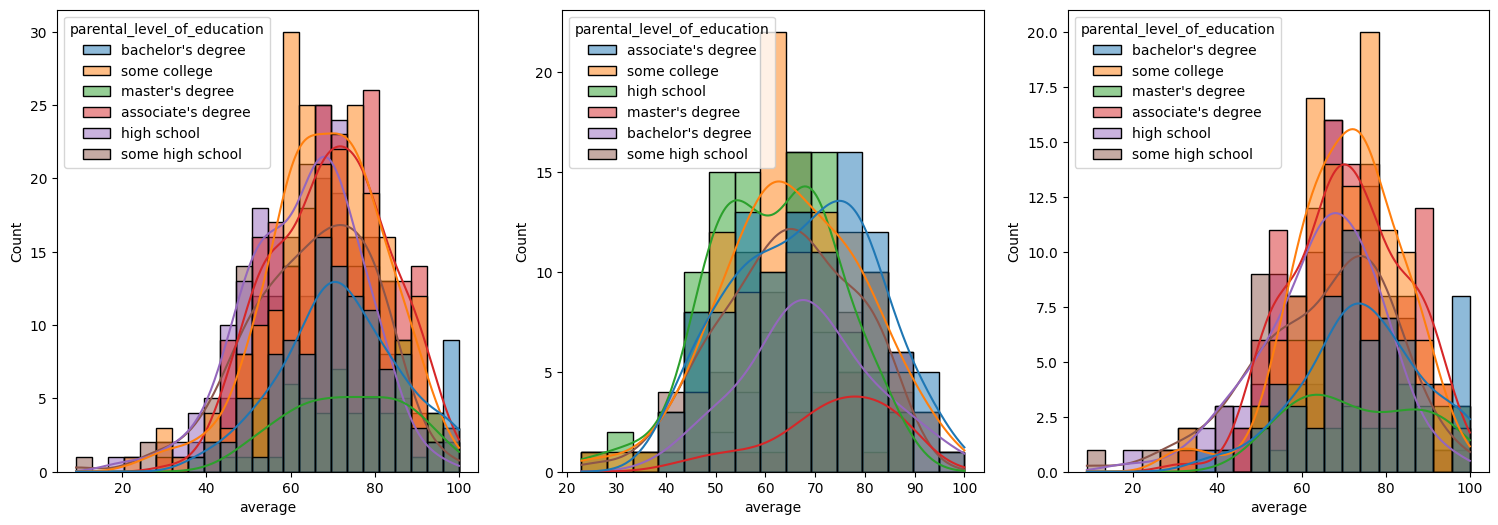

In [17]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=StudentPerformance,x='average',kde=True,hue='parental_level_of_education')
plt.subplot(142)
ax =sns.histplot(data=StudentPerformance[StudentPerformance.gender=='male'],x='average',kde=True,hue='parental_level_of_education')
plt.subplot(143)
ax =sns.histplot(data=StudentPerformance[StudentPerformance.gender=='female'],x='average',kde=True,hue='parental_level_of_education')
plt.show()

In [58]:
pip install plotly


   ---------------------------------------- 0.0/15.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.7 MB 435.7 kB/s eta 0:00:36
   - -------------------------------------- 0.6/15.7 MB 6.1 MB/s eta 0:00:03
   ---- ----------------------------------- 1.9/15.7 MB 13.7 MB/s eta 0:00:02
   -------- ------------------------------- 3.3/15.7 MB 16.2 MB/s eta 0:00:01
   ----------- ---------------------------- 4.6/15.7 MB 19.3 MB/s eta 0:00:01
   -------------- ------------------------- 5.7/15.7 MB 20.2 MB/s eta 0:00:01
   ------------------- -------------------- 7.5/15.7 MB 22.9 MB/s eta 0:00:01
   ----------------------- ---------------- 9.3/15.7 MB 23.7 MB/s eta 0:00:01
   ------------------------- -------------- 10.0/15.7 MB 23.7 MB/s eta 0:00:01
   ------------------------------- -------- 12.5/15.7 MB 29.8 MB/s eta 0:00:01
   ----------------------------------- ---- 13.8/15.7 MB 32.7 MB/s eta 0:00:0

In [18]:
import plotly.express as px

In [64]:
pip install --upgrade nbformat

   ---------------------------------------- 0.0/77.6 kB ? eta -:--:--
   ------------------------------------ --- 71.7/77.6 kB 3.8 MB/s eta 0:00:01
   ------------------------------------ --- 71.7/77.6 kB 3.8 MB/s eta 0:00:01
   ---------------------------------------- 77.6/77.6 kB 538.8 kB/s eta 0:00:00
   ---------------------------------------- 0.0/85.5 kB ? eta -:--:--
   -------------------------------------- - 81.9/85.5 kB ? eta -:--:--
   ---------------------------------------- 85.5/85.5 kB 1.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
   --------------------------------- ------ 51.2/60.8 kB ? eta -:--:--
   ---------------------------------------- 60.8/60.8 kB 814.7 kB/s eta 0:00:00
   ---------------------------------------- 0.0/206.7 kB ? eta -:--:--
   ---------------------------------------  204.8/206.7 kB ? eta -:--:--
   ---------------------------------------- 206.7/206.7 kB 3.1 MB/s eta 0:00:00
Note: you may need to restart 

In [19]:
fig = px.histogram(StudentPerformance,x=StudentPerformance['parental_level_of_education'], y=StudentPerformance['average'], color=StudentPerformance['parental_level_of_education'], 
template="plotly_dark", width=600,height=400)
fig.show()

OBSERVATION: In general parent's level of education does not help the student to perform well.

In [34]:
ax =px.histogram(StudentPerformance[StudentPerformance.gender=='male'],x=StudentPerformance['parental_level_of_education'], y=StudentPerformance['total_score'], color=StudentPerformance['parental_level_of_education'], 
template="plotly_dark", width=600,height=400)
ax1 = px.histogram(StudentPerformance[StudentPerformance.gender=='female'],x=StudentPerformance['parental_level_of_education'], y=StudentPerformance['total_score'], color=StudentPerformance['parental_level_of_education'], 
template="plotly_dark", width=600,height=400)
ax.show()
ax1.show()

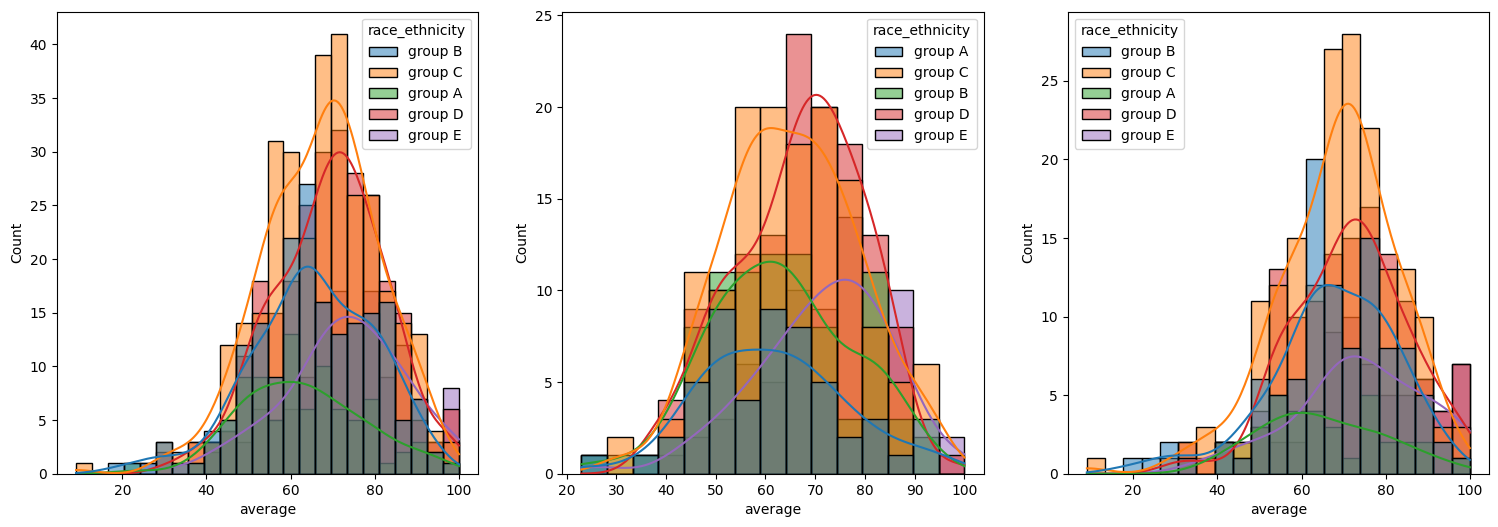

In [36]:
plt.subplots(1,3, figsize=(25,6))
plt.subplot(141)
ax = sns.histplot(data=StudentPerformance,x='average',kde=True,hue='race_ethnicity')
plt.subplot(142)
ax=sns.histplot(data=StudentPerformance[StudentPerformance.gender=='male'],x='average',kde=True,hue='race_ethnicity')
plt.subplot(143)
ax=sns.histplot(data=StudentPerformance[StudentPerformance.gender=='female'],x='average',kde=True,hue='race_ethnicity')
plt.show()

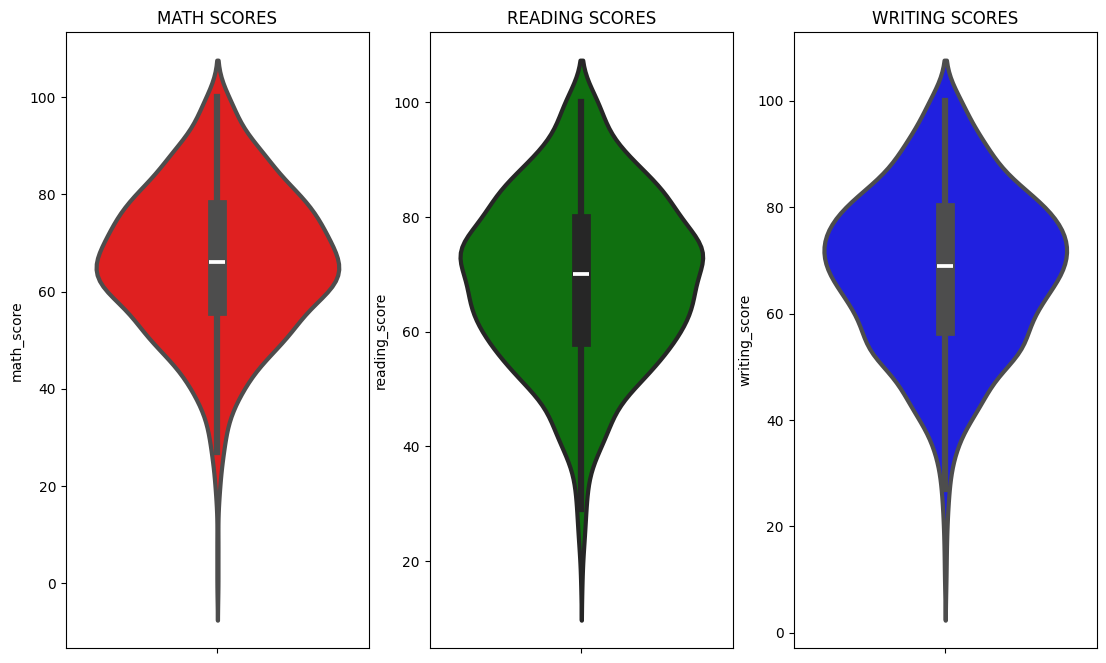

In [43]:
#Maximum score of students in all three subjects
plt.figure(figsize=(18,8))
plt.subplot(1,4,1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=StudentPerformance,color='red',linewidth=3)
plt.subplot(1,4,2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=StudentPerformance,color='green',linewidth=3)
plt.subplot(1,4,3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=StudentPerformance,color='blue',linewidth=3)
plt.show()

OBSERVATION: From these three plots we can observe that most of the students score between 60 to 80 in math, 50 to 80 in Reading and 50 to 80 in writing.

In [64]:
import plotly.express as px
from plotly.subplots import make_subplots

custom_palette = px.colors.qualitative.Dark24

# Pie chart for Gender
fig_gender = px.pie(values=StudentPerformance['gender'].value_counts(), names=['Female', 'Male'], 
                    color_discrete_sequence=custom_palette, title='Gender')
fig_gender.update_traces(textinfo='percent')

# Pie chart for Race/Ethnicity
fig_race = px.pie(values=StudentPerformance['race_ethnicity'].value_counts(), names=['Group C', 'Group D', 'Group B', 'Group E', 'Group A'], 
                  color_discrete_sequence=custom_palette, title='Race/Ethnicity')
fig_race.update_traces(textinfo='percent')

# Pie chart for Lunch
fig_lunch = px.pie(values=StudentPerformance['lunch'].value_counts(), names=['Standard', 'Free'], 
                  color_discrete_sequence=custom_palette, title='Lunch')
fig_lunch.update_traces(textinfo='percent')

# Pie chart for Test Preparation Course
fig_course = px.pie(values=StudentPerformance['test_preparation_course'].value_counts(), names=['None', 'Completed'], 
                    color_discrete_sequence=custom_palette, title='Test Preparation Course')
fig_course.update_traces(textinfo='percent')

# Pie chart for Parental Education
fig_education = px.pie(values=StudentPerformance['parental_level_of_education'].value_counts(), 
                        names=["Some College", "Associate's Degree", 'High School', 'Some High School', "Bachelor's Degree", "Master's Degree"], 
                        color_discrete_sequence=custom_palette, title='Parental Education')
fig_education.update_traces(textinfo='percent')

# Display the pie charts
fig_gender.show()
fig_race.show()
fig_lunch.show()
fig_course.show()
fig_education.show()


Here are some observations from the data:<br>
The distribution of male and female students is nearly balanced.<br>
The largest number of students belong to Group C in terms of race/ethnicity.<br>
A majority of students have standard lunch.<br>
A larger proportion of students have not participated in any test preparation course.<br>
The highest number of students' parental education level falls under "Some College," closely followed by "Associate's Degree."<br>

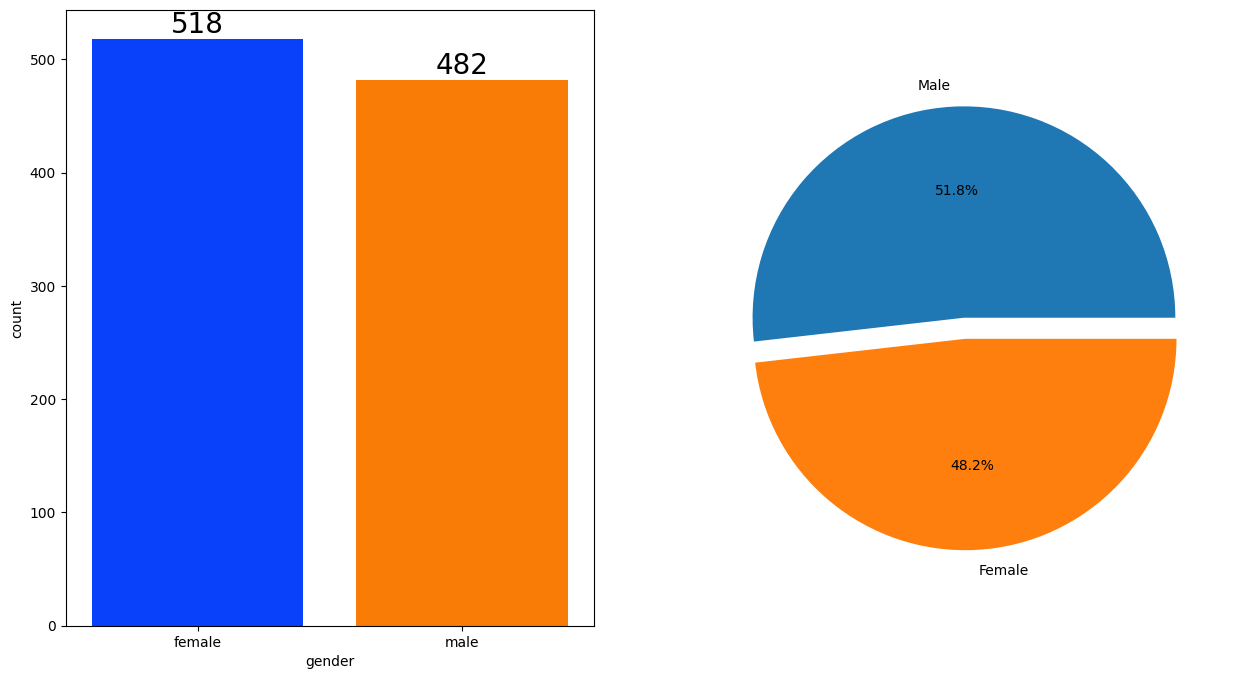

In [71]:
#Univariate Analysis - Analyse the distribution of gender
f,ax = plt.subplots(1,2,figsize = (15,8))
sns.countplot(x=StudentPerformance['gender'],data=StudentPerformance,palette='bright',ax=ax[0],
saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

plt.pie(x=StudentPerformance['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],
        autopct='%1.1f%%')
plt.show()

In [74]:
#Bivariate Analysis - Gender's imapct on student's performance
group_gender = StudentPerformance.groupby('gender').mean(numeric_only=True)
group_gender

,math_score,reading_score,writing_score,total_score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


In [79]:
import numpy as np
print(np.__version__)

1.24.4


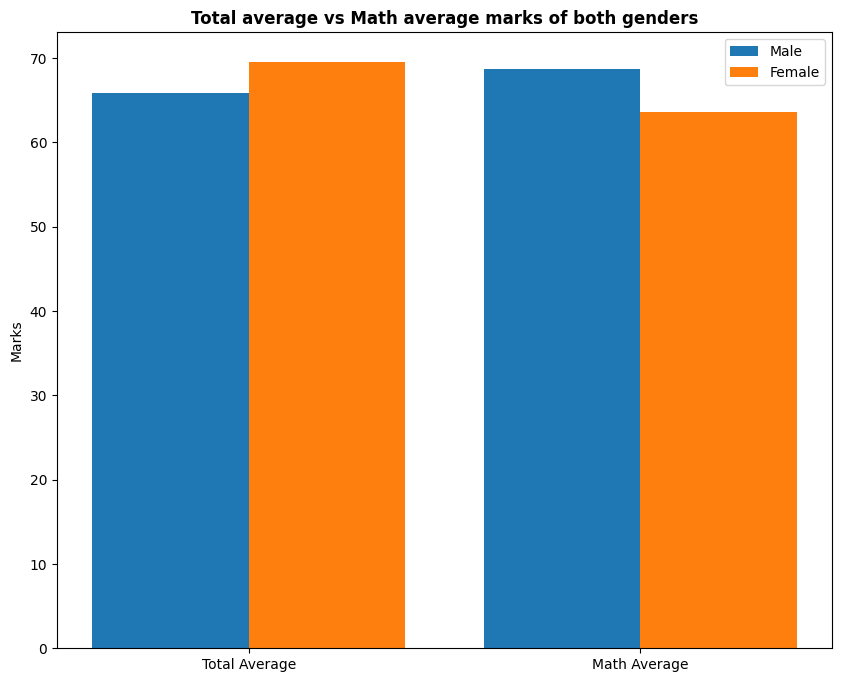

In [81]:
#Bivariate Analysis -> Gender's impact on students's performance
plt.figure(figsize=(10,8))

x=['Total Average','Math Average']

female_scores=[group_gender['average'][0], group_gender['math_score'][0]]
male_scores=[group_gender['average'][1], group_gender['math_score'][1]]

x_axis = np.arange(len(x))

plt.bar(x_axis - 0.2, male_scores, 0.4, label='Male')
plt.bar(x_axis + 0.2, female_scores, 0.4, label='Female')

plt.xticks(x_axis, x)
plt.ylabel("Marks")
plt.title("Total average vs Math average marks of both genders", fontweight='bold')
plt.legend()
plt.show()

OBSERVATION: Although on an average females have better total score than men, but males have a better math score.

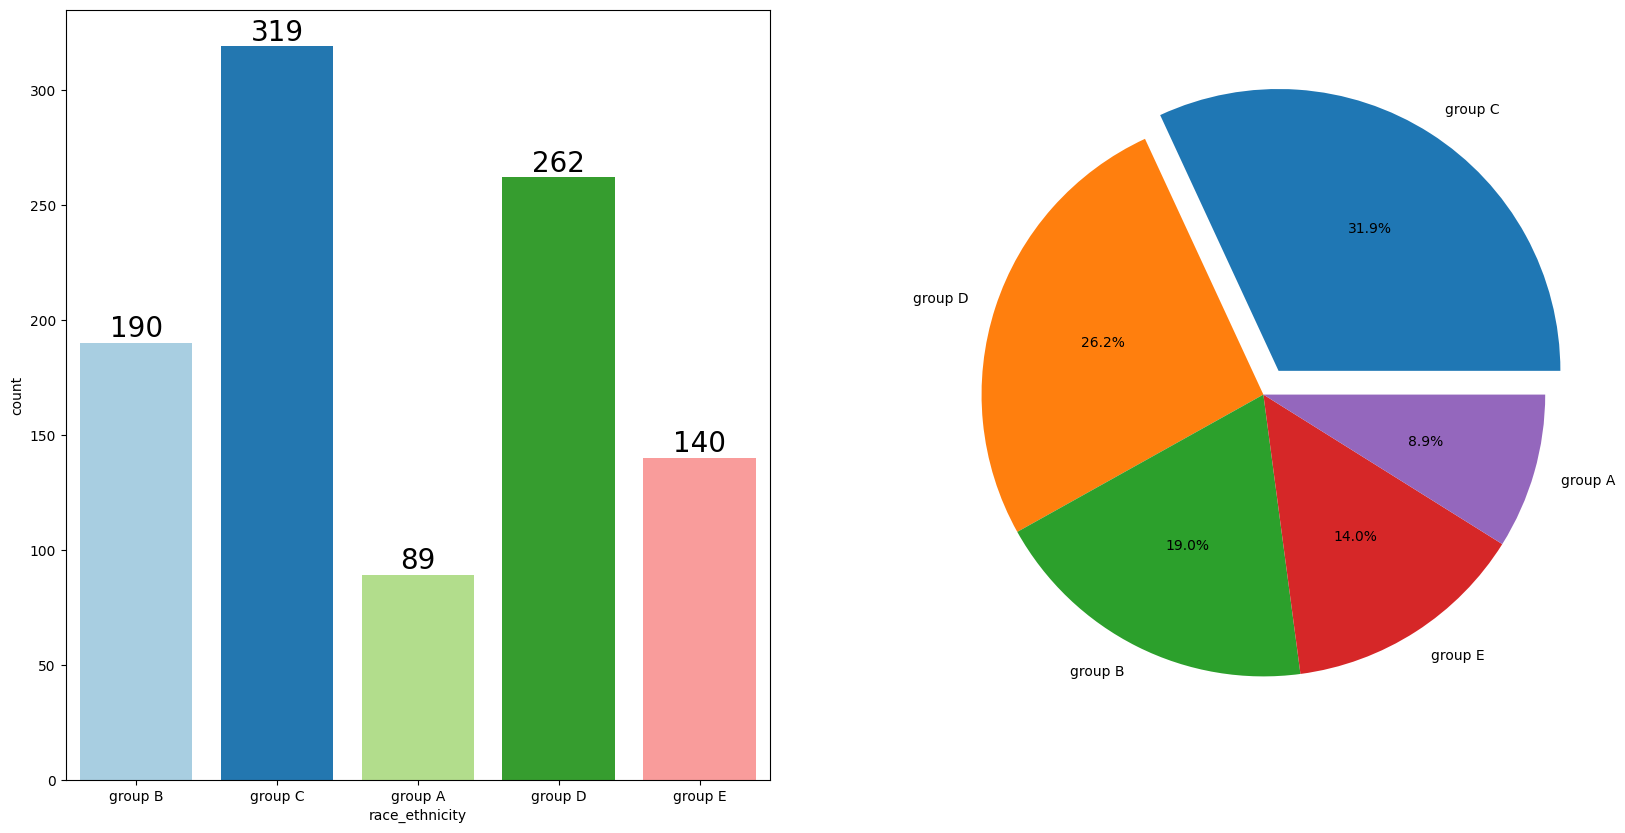

In [89]:
#Univariate Analysis -> Race/Ethnicity wise distribution
f,ax = plt.subplots(1,2,figsize=(20,10))
sns.countplot(data=StudentPerformance,x=StudentPerformance['race_ethnicity'],palette='Paired',
              ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
plt.pie(x=StudentPerformance['race_ethnicity'].value_counts(),labels=StudentPerformance['race_ethnicity']
        .value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%')
plt.show()

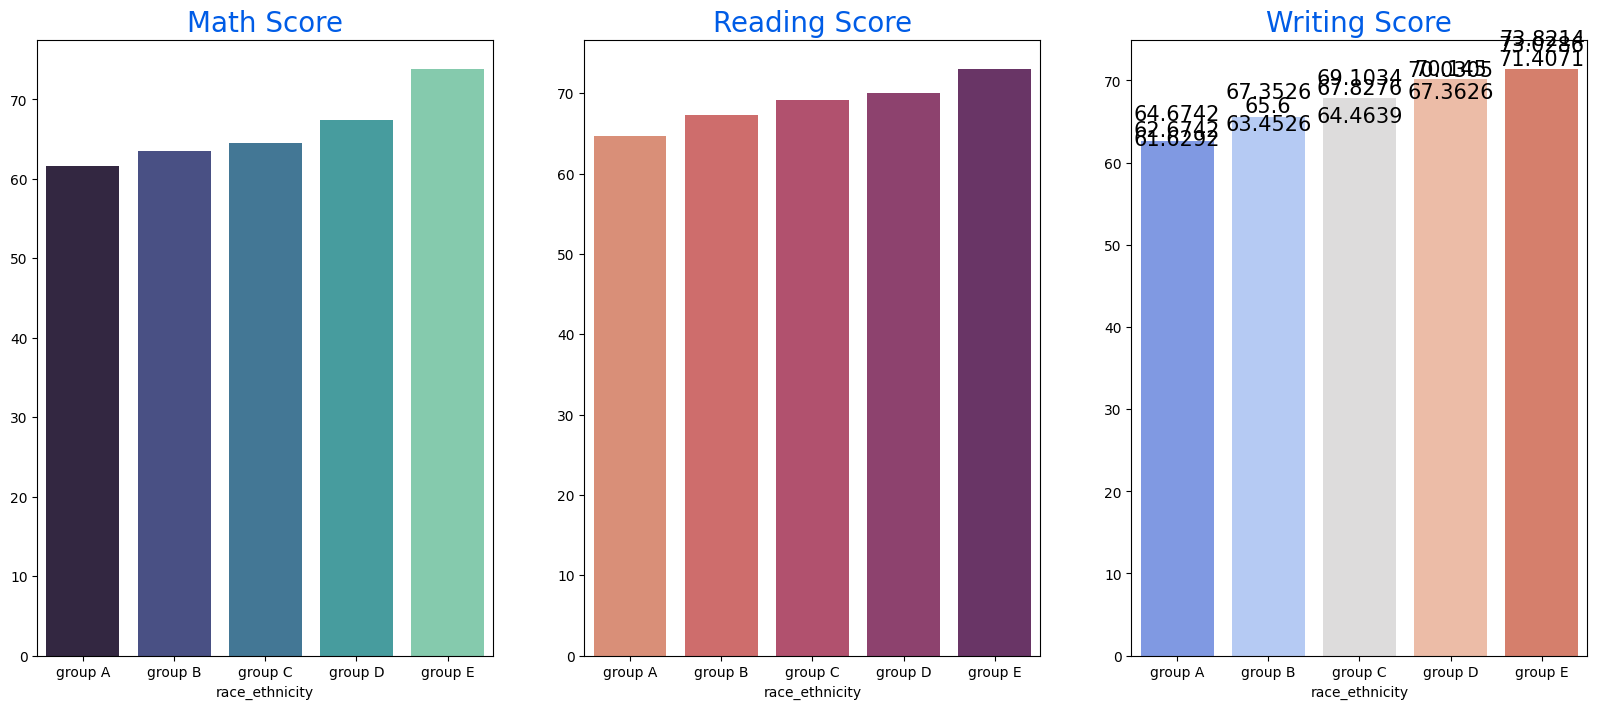

In [91]:
# Bivariate Analysis
Group_data = StudentPerformance.groupby('race_ethnicity')

# Create subplots
f, ax = plt.subplots(1, 3, figsize=(20, 8))

# Plot Math Score
sns.barplot(x=Group_data['math_score'].mean().index, y=Group_data['math_score'].mean().values,
            palette='mako', ax=ax[0])
ax[0].set_title('Math Score', color='#005ce6', size=20)
for container in ax[0].containers:
    plt.bar_label(container, color='black', size=15)

# Plot Reading Score
sns.barplot(x=Group_data['reading_score'].mean().index, y=Group_data['reading_score'].mean().values,
            palette='flare', ax=ax[1])
ax[1].set_title('Reading Score', color='#005ce6', size=20)
for container in ax[1].containers:
    plt.bar_label(container, color='black', size=15)

# Plot Writing Score
sns.barplot(x=Group_data['writing_score'].mean().index, y=Group_data['writing_score'].mean().values,
            palette='coolwarm', ax=ax[2])
ax[2].set_title('Writing Score', color='#005ce6', size=20)
for container in ax[2].containers:
    plt.bar_label(container, color='black', size=15)

plt.show()


OBSERVATION:
1) Group E scored the highest marks, Group A scored the lowest.
2) Students from a lower socioeconimic status have a lower average in all course subjects.

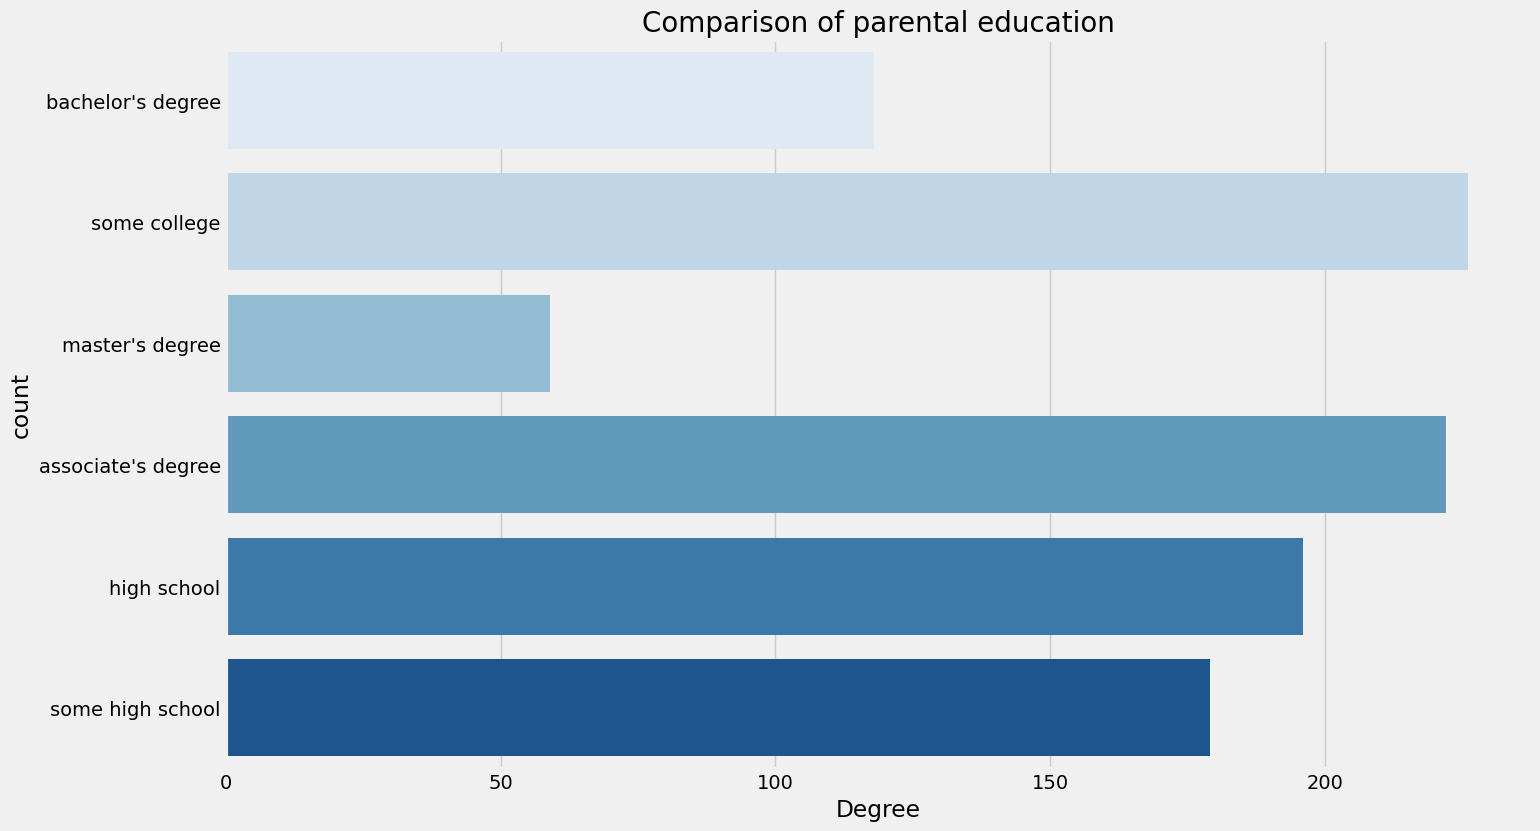

In [94]:
#Univariate Analysis -> Educational background of student's parents
plt.rcParams['figure.figsize']=(15,9)
plt.style.use('fivethirtyeight')
sns.countplot(StudentPerformance['parental_level_of_education'],palette='Blues')
plt.title('Comparison of parental education',fontweight=30,fontsize=20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

OBSERVATION: Largest number of parents are from some college and most of them also have an associate's degree.

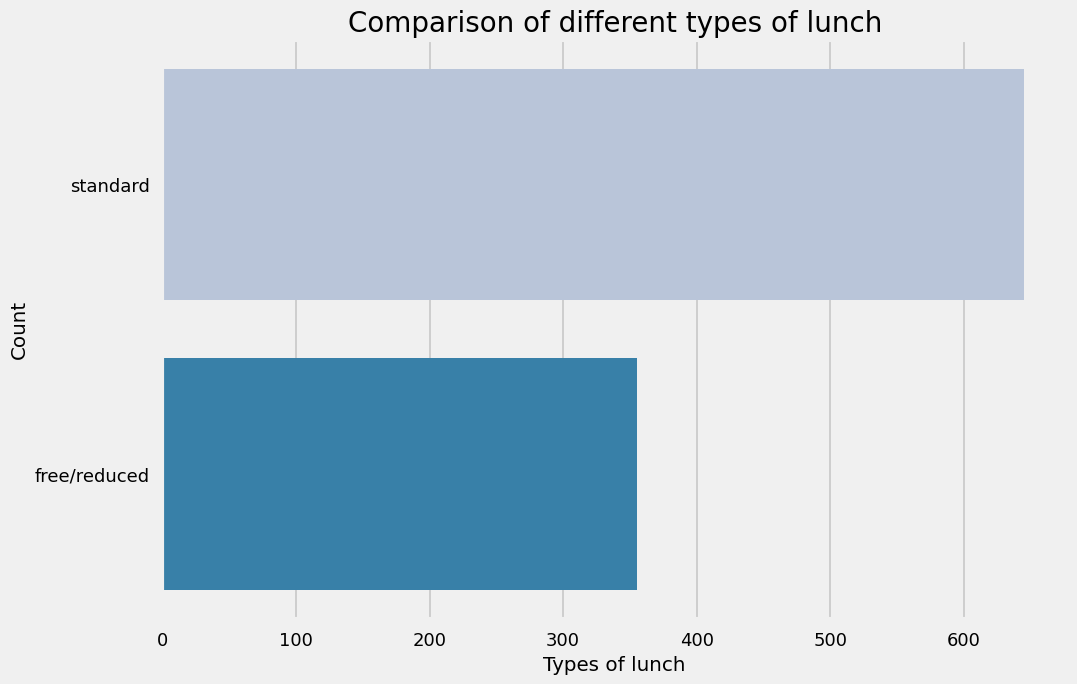

In [98]:
#Univariate Analysis -> Most common lunch among students
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-talk')
sns.countplot(StudentPerformance['lunch'],palette='PuBu')
plt.title('Comparison of different types of lunch',fontweight=30,fontsize=20)
plt.xlabel('Types of lunch')
plt.ylabel('Count')
plt.show()

OBSERVATION: Most of the students are being served standard lunch

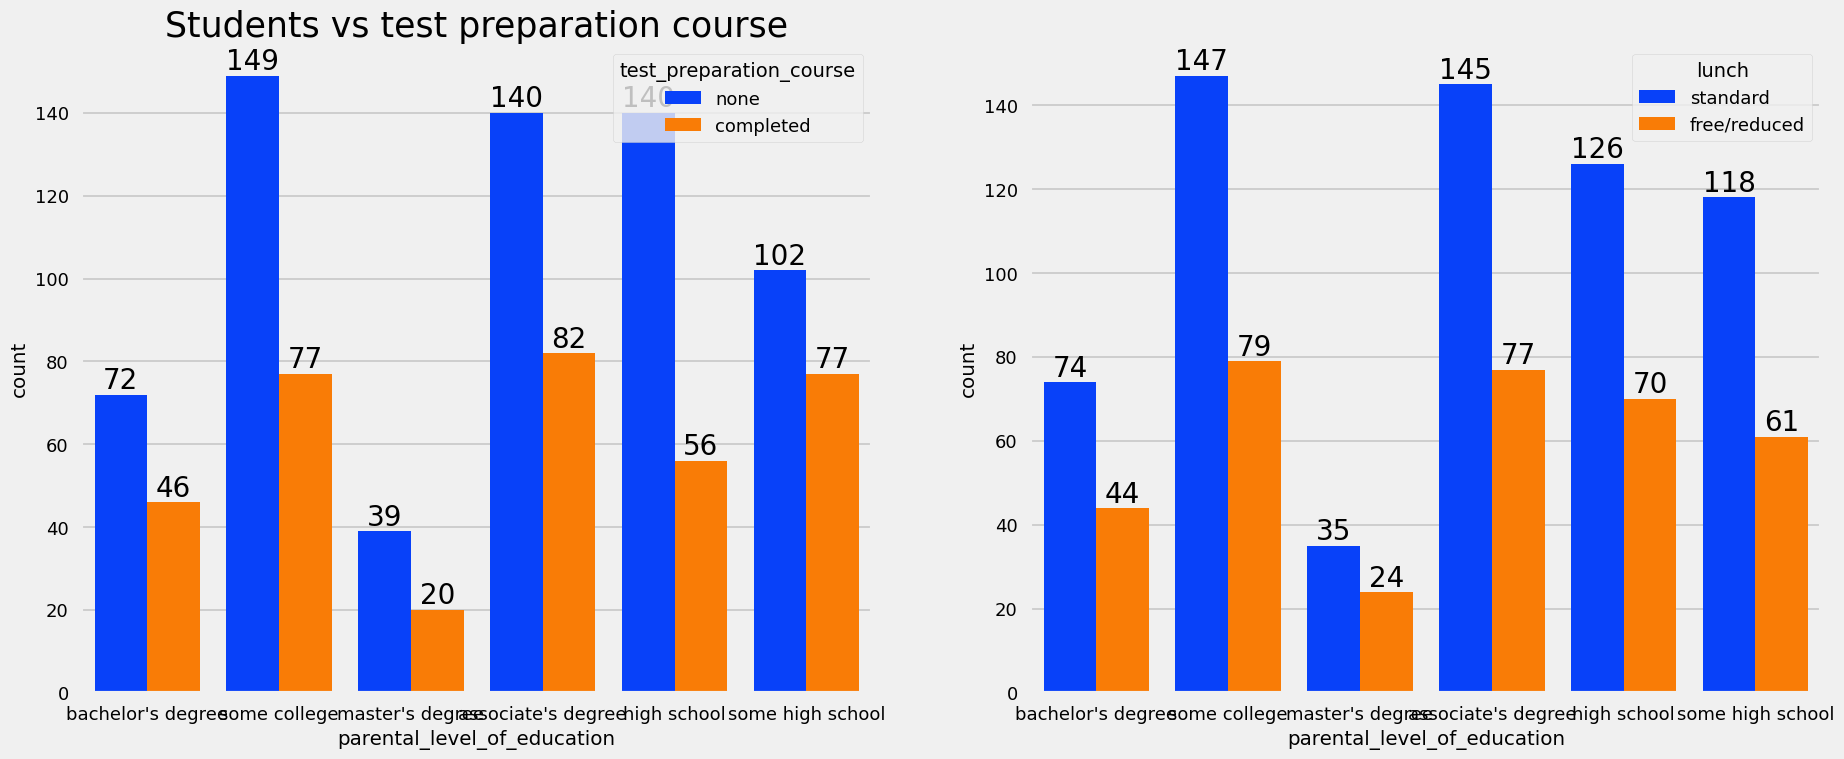

In [103]:
#Bivariate Analysis -> Impact of lunch on student's performance
f,ax = plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=StudentPerformance['parental_level_of_education'],data=StudentPerformance,
              palette = 'bright', hue='test_preparation_course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

sns.countplot(data=StudentPerformance,x=StudentPerformance['parental_level_of_education'],palette='bright',
              hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)

OBSERVATION: Students who get standard lunch tend to perform better than students who got free lunch

<Axes: xlabel='lunch', ylabel='math_score'>

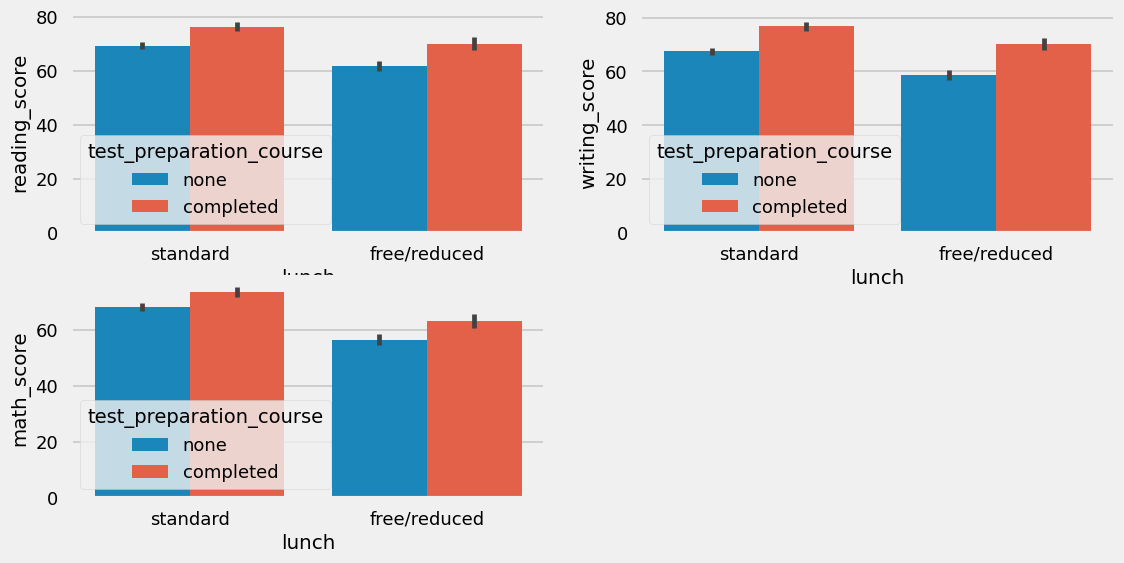

In [104]:
#Bivariate Analysis -> Test preparation course impact on student's performance
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot(x=StudentPerformance['lunch'],y=StudentPerformance['reading_score'],hue=StudentPerformance['test_preparation_course'])
plt.subplot(2,2,2)
sns.barplot(x=StudentPerformance['lunch'],y=StudentPerformance['writing_score'],hue=StudentPerformance['test_preparation_course'])
plt.subplot(2,2,3)
sns.barplot(x=StudentPerformance['lunch'],y=StudentPerformance['math_score'],hue=StudentPerformance['test_preparation_course'])

OBSERVATION: Students with standard lunch who have completed the test preparation course have scored the highest in all three courses

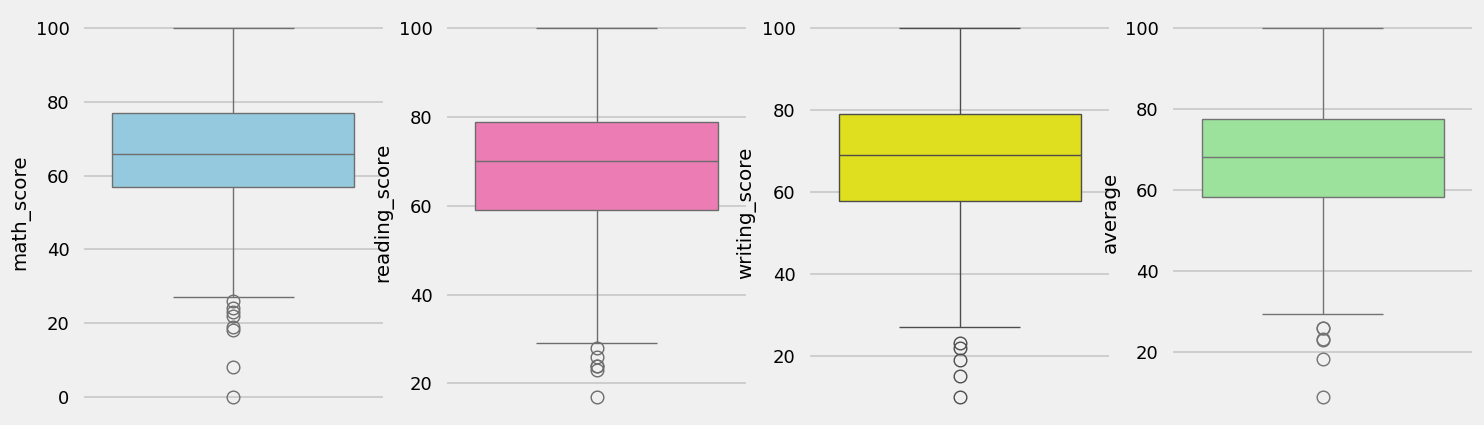

In [110]:
#Checking Outliers
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(StudentPerformance['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(StudentPerformance['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(StudentPerformance['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(StudentPerformance['average'],color='lightgreen')
plt.show()

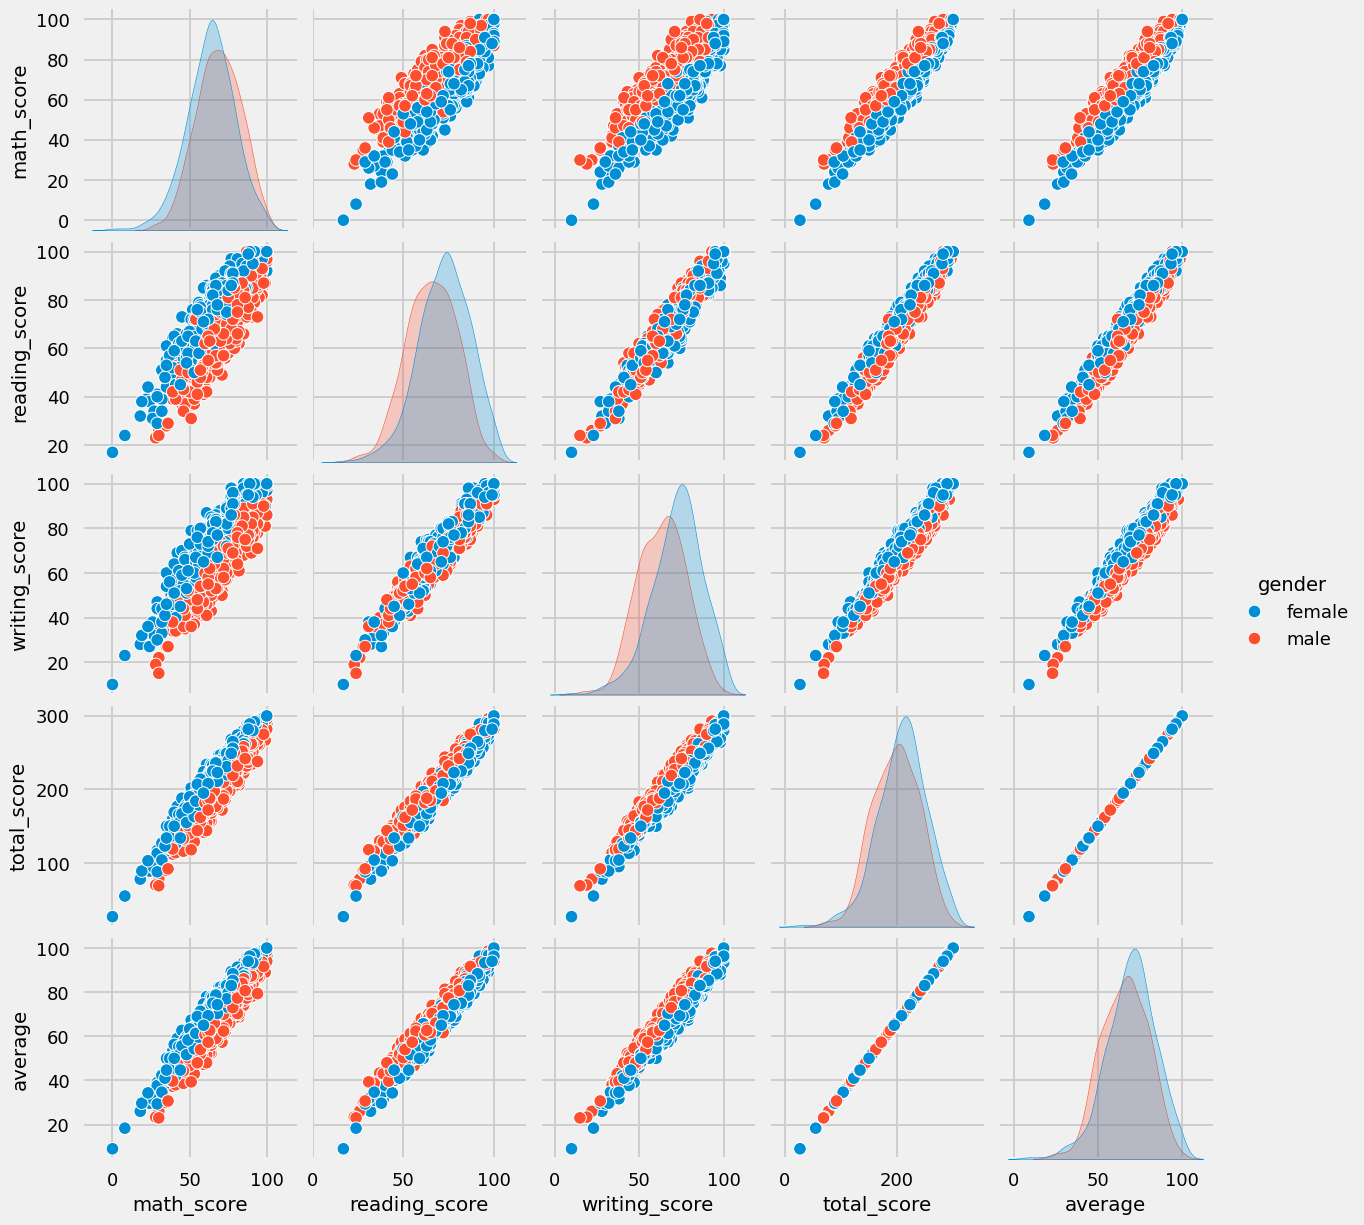

In [111]:
#Multivariate Analysis using Pairplot
sns.pairplot(StudentPerformance,hue='gender')
plt.show()